# Execute the Graph-Based Spatial Cross-Validation experiments from ICMLA21 Paper

## 1 - Initialize libraries

In [1]:
import os
import pandas as pd
from src import utils
from src.visualization.performance import VizMetrics
from src.visualization.dependence import VizDependence

## 2 - Initialize loggers

In [2]:
utils.initialize_coloredlog()
utils.initialize_rich_tracerback()
utils.initialize_logging()

## 3 - Initialize working path and enviromental variables

In [3]:
# Project path
project_dir = os.path.abspath('')[:-5]
# Load enviromental variables
env_var = utils.load_env_variables(project_dir)

## 4 - Load the data

In [4]:
# Set paths
adj_path = os.path.join(env_var["root_path"], "queen_matrix.csv")
# Load data
adj_matrix = pd.read_csv(adj_path, low_memory=False)
# Set adjacency matrix index
adj_matrix.set_index(adj_matrix.columns[0], inplace=True)

Index(['INDEX_FOLDS', 'TARGET', '[CENSUS]_DOMICILIO01_V002',
       '[CENSUS]_DOMICILIO01_V003', '[CENSUS]_DOMICILIO01_V004',
       '[CENSUS]_DOMICILIO01_V005', '[CENSUS]_DOMICILIO01_V006',
       '[CENSUS]_DOMICILIO01_V007', '[CENSUS]_DOMICILIO01_V008',
       '[CENSUS]_DOMICILIO01_V009',
       ...
       '[CENSUS]_RESPONSAVELRENDA_V123', '[CENSUS]_RESPONSAVELRENDA_V124',
       '[CENSUS]_RESPONSAVELRENDA_V125', '[CENSUS]_RESPONSAVELRENDA_V126',
       '[CENSUS]_RESPONSAVELRENDA_V127', '[CENSUS]_RESPONSAVELRENDA_V128',
       '[CENSUS]_RESPONSAVELRENDA_V129', '[CENSUS]_RESPONSAVELRENDA_V130',
       '[CENSUS]_RESPONSAVELRENDA_V131', '[CENSUS]_RESPONSAVELRENDA_V132'],
      dtype='object', length=4000)

## 7 - Generate plots
OBS: The plots generate will be in the created folder comparison in the data directory 

### 7.1 Generate performance plots

2021-11-04 12:42:36 DESKTOP-117CMAH root[22824] INFO Generating mean table.


Generating performance plots...


Generating plots: 100%|██████████| 3/3 [00:04<00:00,  1.61s/it]


                   UltraConservative  SRBuffer   RBuffer  Optimistic
UltraConservative           1.000000  0.586479  0.734163    0.004145
SRBuffer                    0.586479  1.000000  0.900000    0.123839
RBuffer                     0.734163  0.900000  1.000000    0.067751
Optimistic                  0.004145  0.123839  0.067751    1.000000


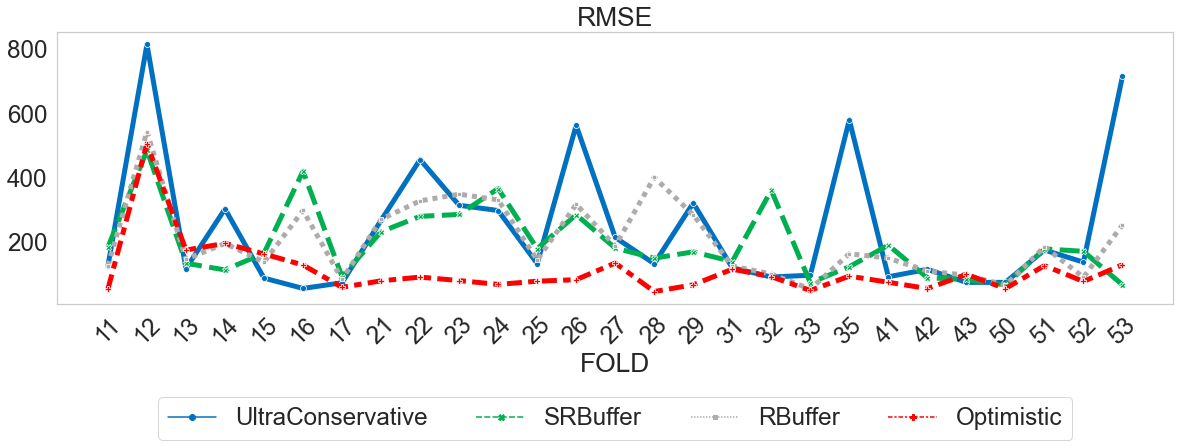

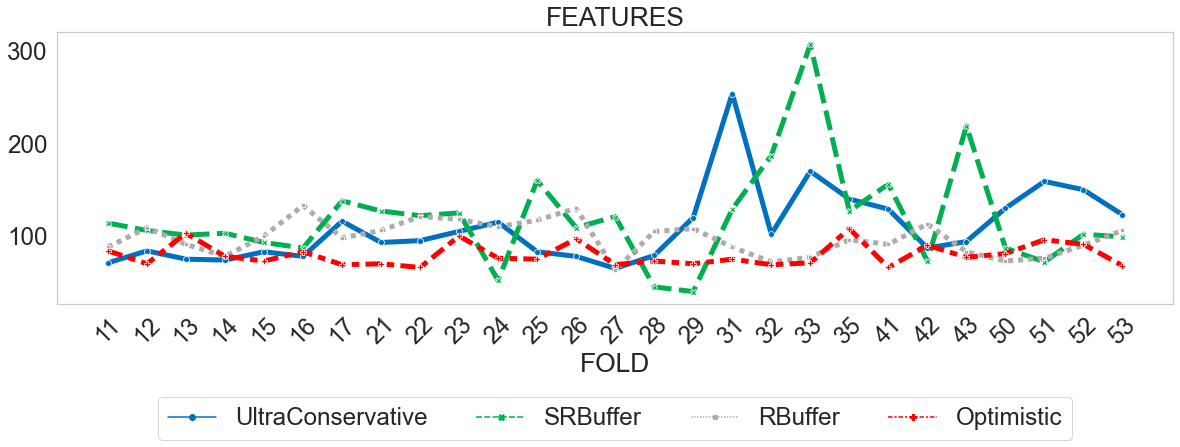

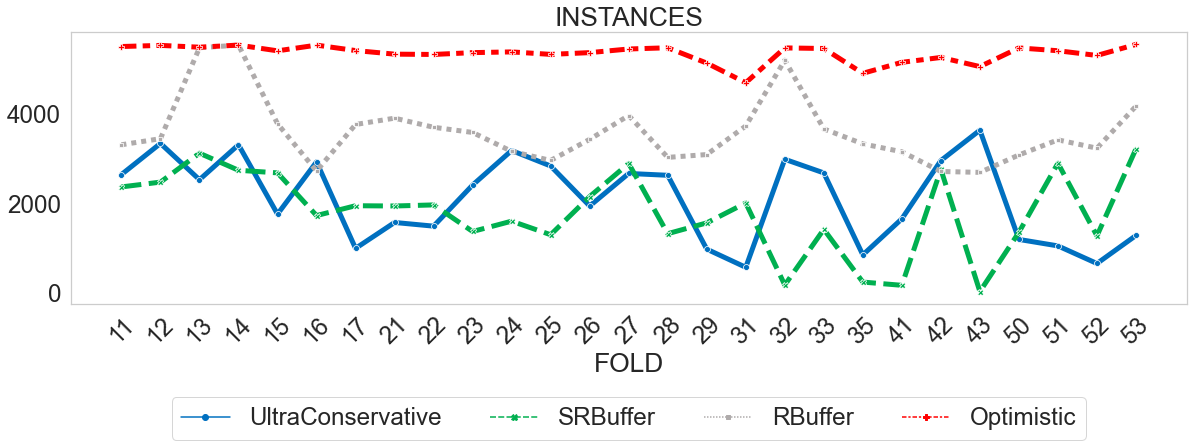

In [7]:
viz_metrics = VizMetrics(
    root_path=env_var["root_path"],
    cv_methods=["UltraConservative", "SRBuffer", "RBuffer", "Optimistic"],
    index_col="FOLD",
    fs_method="CFS",
    ml_method="LGBM",
)
print("Generating performance plots...")
viz_metrics.run()

### 7.2 Generate dependence plot

Generating dependence plot...


100%|██████████| 4/4 [04:35<00:00, 68.88s/it]


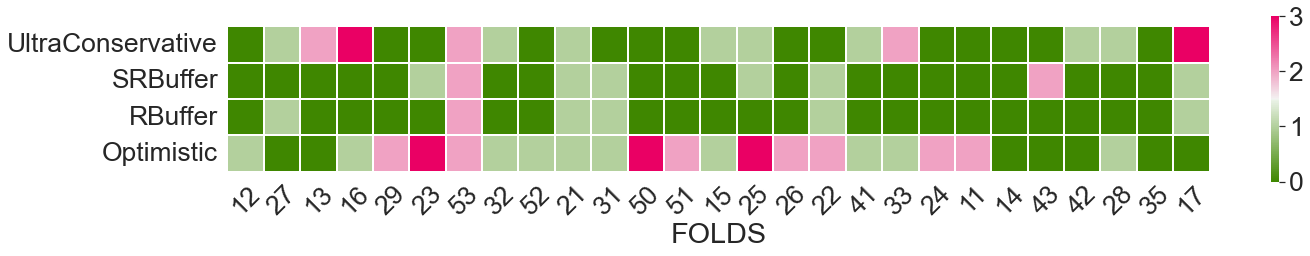

In [8]:
viz_dependence = VizDependence(
    root_path=env_var["root_path"],
    cv_methods=["UltraConservative", "SRBuffer", "RBuffer", "Optimistic"],
    index_col="INDEX",
    fold_col="INDEX_FOLDS",
    target_col="TARGET",
    adj_matrix=adj_matrix,
    prob=0.95,
    fold_list=data["INDEX_FOLDS"].unique(),
    paper=True,
)
print("Generating dependence plot...")
viz_dependence.run()